# Imports Required

In [59]:
#initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

# Train/test preparation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Metrics Performance
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Naive Bias
from sklearn.naive_bayes import GaussianNB

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# To save model with pickle
import pickle

# To save model with joblib
import joblib

# Random Tree
from sklearn.ensemble import RandomForestClassifier

#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# xg Boost
from xgboost import XGBClassifier

# EDA

### Load dataset

In [2]:
#loding the dataset
df=pd.read_csv("Occupancy_Estimation.csv")

In [3]:
df.head(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [4]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [6]:
df[df.Room_Occupancy_Count==0].head(2)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
346,2017/12/22,14:15:58,26.19,27.25,26.13,26.44,19,22,97,60,0.42,3.03,3.67,0.64,950,-0.069231,1,1,0
347,2017/12/22,14:16:28,26.19,27.06,26.13,26.38,19,22,98,59,2.32,2.08,1.64,0.10,960,-0.226923,1,1,0


In [7]:
df[df.Room_Occupancy_Count==1].head(2)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1


In [8]:
df[df.Room_Occupancy_Count==2].head(2)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
75,2017/12/22,11:28:29,25.38,25.44,24.81,25.69,150,187,63,49,0.46,0.46,0.21,0.11,450,1.088462,1,1,2
76,2017/12/22,11:29:00,25.38,25.44,24.81,25.75,153,216,63,49,0.76,0.74,0.15,0.14,450,1.003846,1,1,2


In [9]:
df[df.Room_Occupancy_Count==3].head(2)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
191,2017/12/22,12:30:16,25.69,28.44,25.19,26.00,156,244,190,64,1.12,0.49,0.77,0.25,645,0.411538,1,1,3
192,2017/12/22,12:30:47,25.75,28.56,25.19,26.06,158,245,205,65,0.91,0.29,2.83,0.29,650,0.434615,1,1,3


In [10]:
df.Room_Occupancy_Count.value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

## Distribution plots

C:\Users\91994\AppData\Local\Temp\ipykernel_3844\509903313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['S1_Temp']], color='g', bins=20, hist_kws={'alpha': 0.4})


<Axes: ylabel='Density'>

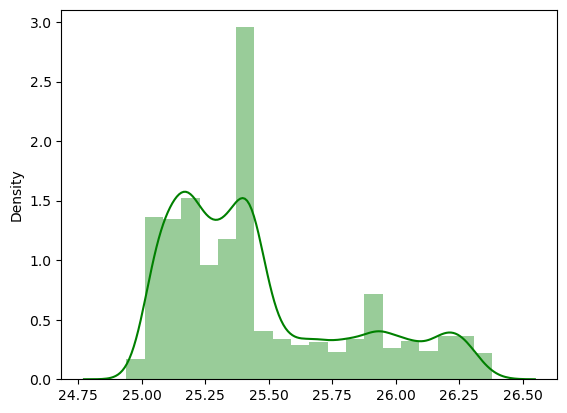

In [11]:
sns.distplot(df[['S1_Temp']], color='g', bins=20, hist_kws={'alpha': 0.4})

## Box plots

S1_Temp        Axes(0.125,0.77;0.352273x0.11)
S2_Temp     Axes(0.547727,0.77;0.352273x0.11)
S3_Temp       Axes(0.125,0.638;0.352273x0.11)
S4_Temp    Axes(0.547727,0.638;0.352273x0.11)
dtype: object

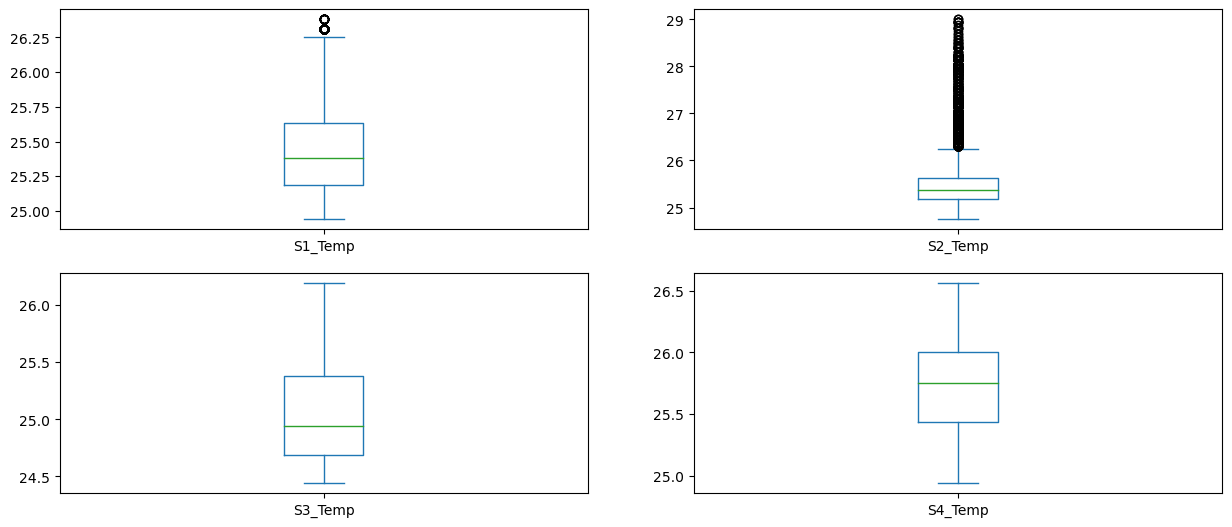

In [12]:
df[["S1_Temp","S2_Temp","S3_Temp","S4_Temp"]].plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))

S1_Light        Axes(0.125,0.77;0.352273x0.11)
S2_Light     Axes(0.547727,0.77;0.352273x0.11)
S3_Light       Axes(0.125,0.638;0.352273x0.11)
S4_Light    Axes(0.547727,0.638;0.352273x0.11)
dtype: object

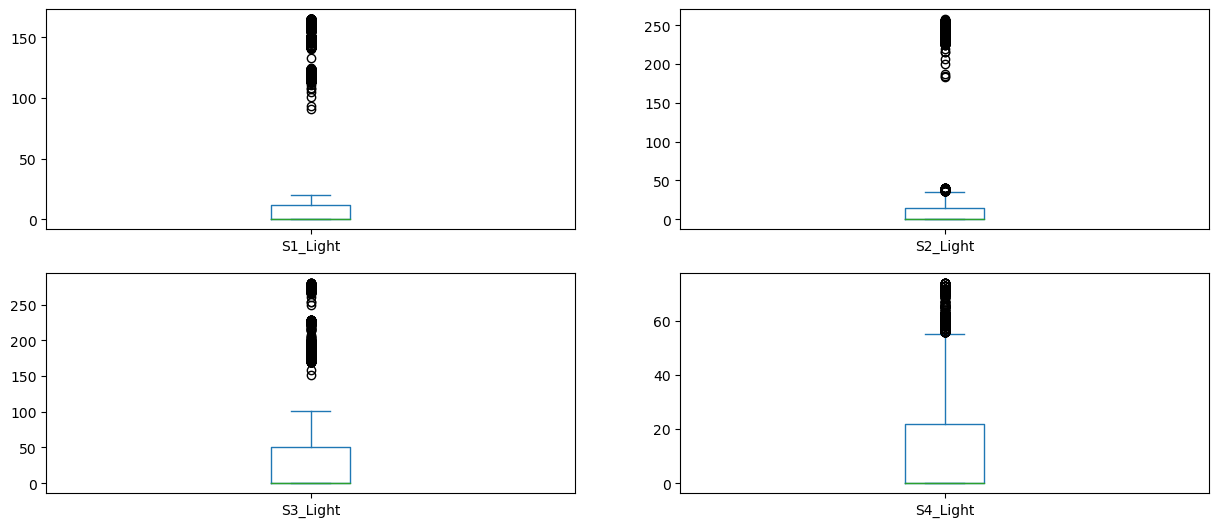

In [13]:
df[["S1_Light","S2_Light","S3_Light","S4_Light"]].plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))

S1_Sound        Axes(0.125,0.77;0.352273x0.11)
S2_Sound     Axes(0.547727,0.77;0.352273x0.11)
S3_Sound       Axes(0.125,0.638;0.352273x0.11)
S4_Sound    Axes(0.547727,0.638;0.352273x0.11)
dtype: object

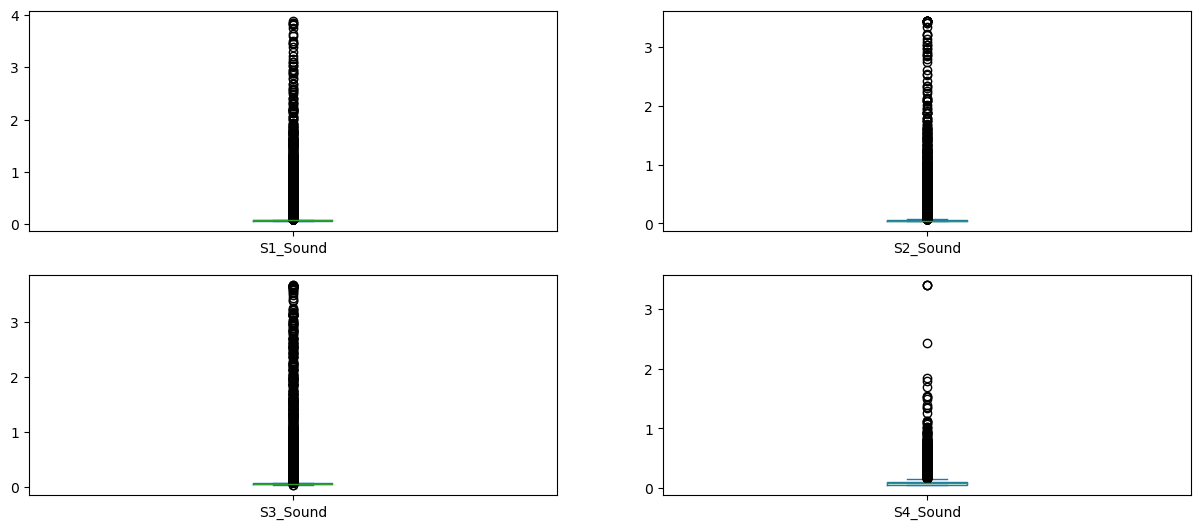

In [14]:
df[["S1_Sound","S2_Sound","S3_Sound","S4_Sound"]].plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))

## Bar plots

<Axes: title={'center': 'Occupancy vs S7_PIR'}, xlabel='Room_Occupancy_Count'>

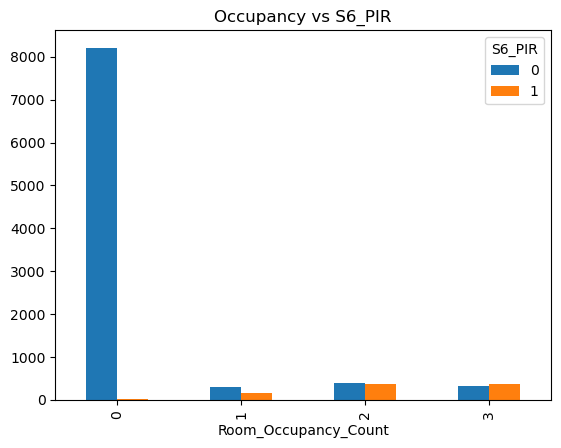

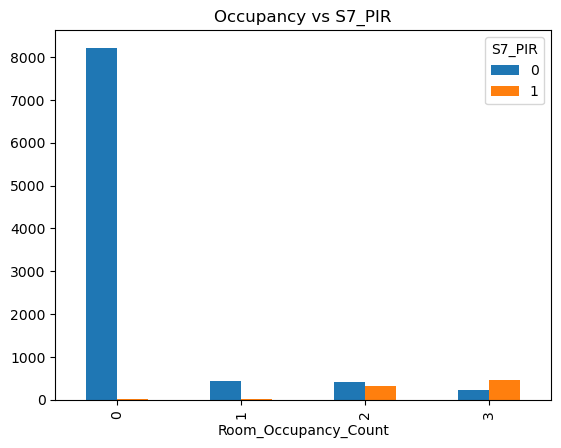

In [15]:
pd.crosstab(df["Room_Occupancy_Count"],df["S6_PIR"]).reset_index().plot(x='Room_Occupancy_Count', kind='bar',
        title='Occupancy vs S6_PIR')
pd.crosstab(df["Room_Occupancy_Count"],df["S7_PIR"]).reset_index().plot(x='Room_Occupancy_Count', kind='bar',
        title='Occupancy vs S7_PIR')

## Bivariate Analysis

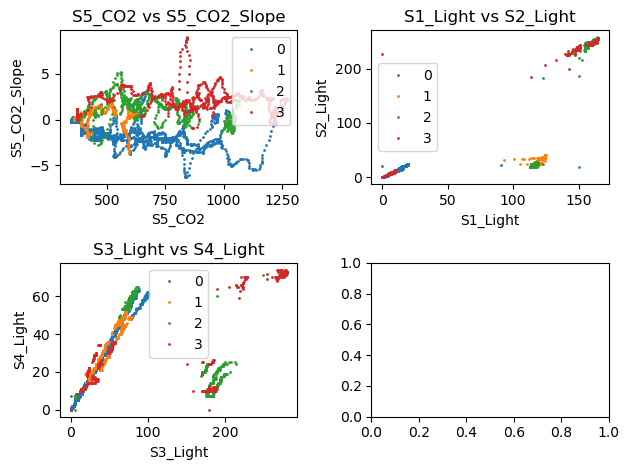

In [16]:
sdf = df[["S5_CO2","S5_CO2_Slope","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')

# Plot
fig, ax = plt.subplots(2,2)
ax[0,0].margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[0,0].plot(group.S5_CO2, group.S5_CO2_Slope, marker='o', linestyle='', ms=1, label=name)
ax[0,0].set_title('S5_CO2 vs S5_CO2_Slope')
ax[0,0].legend()
ax[0,0].set(xlabel='S5_CO2', ylabel='S5_CO2_Slope')


sdf = df[["S1_Light","S2_Light","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')
ax[0,1].margins(0.05)
for name, group in groups:
    ax[0,1].plot(group.S1_Light, group.S2_Light, marker='o', linestyle='', ms=1, label=name)
ax[0,1].set_title('S1_Light vs S2_Light')
ax[0,1].set(xlabel='S1_Light', ylabel='S2_Light')
ax[0,1].legend()

sdf = df[["S3_Light","S4_Light","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')

ax[1,0].margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[1,0].plot(group.S3_Light, group.S4_Light, marker='o', linestyle='', ms=1, label=name)
ax[1,0].legend()
ax[1,0].set_title('S3_Light vs S4_Light')
ax[1,0].set(xlabel='S3_Light', ylabel='S4_Light')

fig.tight_layout()
plt.show()

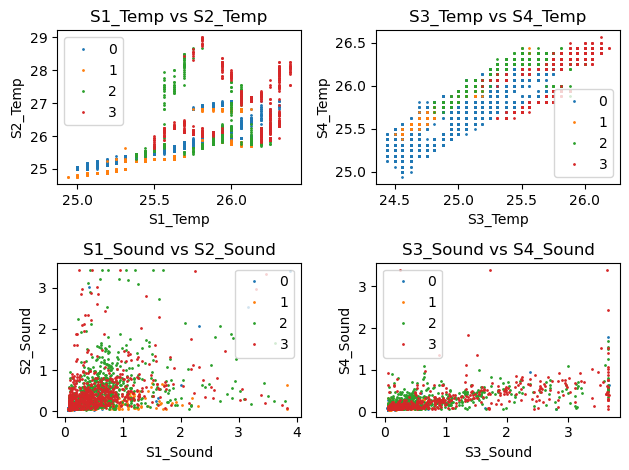

In [18]:
sdf = df[["S1_Temp","S2_Temp","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')

# Plot
fig, ax = plt.subplots(2,2)
ax[0,0].margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[0,0].plot(group.S1_Temp, group.S2_Temp, marker='o', linestyle='', ms=1, label=name)
ax[0,0].set_title('S1_Temp vs S2_Temp')
ax[0,0].set(xlabel='S1_Temp', ylabel='S2_Temp')
ax[0,0].legend()

sdf = df[["S3_Temp","S4_Temp","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')

ax[0,1].margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[0,1].plot(group.S3_Temp, group.S4_Temp, marker='o', linestyle='', ms=1, label=name)
ax[0,1].set_title('S3_Temp vs S4_Temp')
ax[0,1].set(xlabel='S3_Temp', ylabel='S4_Temp')
ax[0,1].legend()

sdf = df[["S1_Sound","S2_Sound","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')

ax[1,0].margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[1,0].plot(group.S1_Sound, group.S2_Sound, marker='o', linestyle='', ms=1, label=name)
ax[1,0].set_title('S1_Sound vs S2_Sound')
ax[1,0].set(xlabel='S1_Sound', ylabel='S2_Sound')
ax[1,0].legend()

sdf = df[["S3_Sound","S4_Sound","Room_Occupancy_Count"]]
groups = sdf.groupby('Room_Occupancy_Count')

ax[1,1].margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax[1,1].plot(group.S3_Sound, group.S4_Sound, marker='o', linestyle='', ms=1, label=name)
ax[1,1].set_title('S3_Sound vs S4_Sound')
ax[1,1].set(xlabel='S3_Sound', ylabel='S4_Sound')
ax[1,1].legend()


fig.tight_layout()
plt.show()

## Correlation Matrix

In [24]:
df[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',"Room_Occupancy_Count"]].corr()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


## Scatter plot

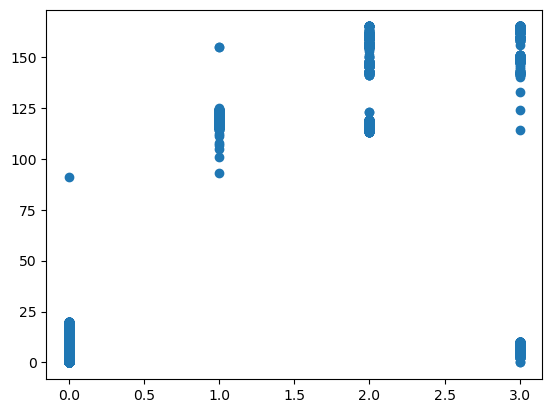

In [25]:
figure=plt.scatter(x=df["Room_Occupancy_Count"],y=df["S1_Light"])


In [26]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

## Train / Test Data Preparation

In [27]:
X = df[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',]]

y = df['Room_Occupancy_Count']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# KNN

In [29]:
#knn model
knn_model = KNeighborsClassifier(n_neighbors=3)

In [39]:
#Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
knn_model.fit((scaler.transform(X_train)),y_train)
scaler.fit(X_test)
y_pred = knn_model.predict(scaler.transform(X_test))

In [31]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1639
           1       1.00      0.99      0.99        92
           2       0.97      0.97      0.97       153
           3       0.97      0.97      0.97       142

    accuracy                           1.00      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026



In [32]:
# Metrics Performance
print(confusion_matrix(y_test,y_pred))

[[1639    0    0    0]
 [   0   91    1    0]
 [   0    0  149    4]
 [   0    0    4  138]]


# Logistic regression

In [42]:
# Logistic regression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [43]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       0.98      0.96      0.97        67
           2       0.96      0.93      0.94       143
           3       0.92      0.96      0.94       124

    accuracy                           0.99      2026
   macro avg       0.97      0.96      0.96      2026
weighted avg       0.99      0.99      0.99      2026



In [44]:
# Metrics Performance
print(confusion_matrix(y_test,y_pred))

[[1691    0    0    1]
 [   0   64    3    0]
 [   0    1  133    9]
 [   2    0    3  119]]


# Naive Bias

In [45]:
# Naive Bias
nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)

In [46]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1692
           1       1.00      0.88      0.94        67
           2       0.84      0.92      0.88       143
           3       0.68      0.82      0.74       124

    accuracy                           0.96      2026
   macro avg       0.88      0.90      0.89      2026
weighted avg       0.97      0.96      0.96      2026



In [47]:
print(confusion_matrix(y_test,y_pred))

[[1656    0    0   36]
 [   0   59    8    0]
 [   0    0  131   12]
 [   5    0   17  102]]


# Decision Tree

In [68]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [69]:
# Decision Tree
DecisionTreeClassifier()

DecisionTreeClassifier()

In [70]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       1.00      0.96      0.98        67
           2       0.97      0.98      0.97       143
           3       0.98      0.97      0.97       124

    accuracy                           1.00      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026



In [71]:
print(confusion_matrix(y_test,y_pred))

[[1692    0    0    0]
 [   0   64    3    0]
 [   0    0  140    3]
 [   2    0    2  120]]


# Saving the model

### Pickle

In [52]:
#save model
filename = 'finalized_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))

In [53]:
# load the model from disk
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)
y_pred = loaded_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9950641658440277
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       1.00      0.96      0.98        67
           2       0.97      0.98      0.97       143
           3       0.98      0.97      0.97       124

    accuracy                           1.00      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026

[[1692    0    0    0]
 [   0   64    3    0]
 [   0    0  140    3]
 [   2    0    2  120]]


### Joblib

In [54]:
# save the model to disk
joblib.dump(dt_model,'finalized_model_joblib.sav')

['finalized_model_joblib.sav']

In [55]:
#load the model
loaded_model2 = joblib.load("finalized_model_joblib.sav")
result = loaded_model2.score(X_test, y_test)
print(result)
y_pred = loaded_model2.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9950641658440277
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       1.00      0.96      0.98        67
           2       0.97      0.98      0.97       143
           3       0.98      0.97      0.97       124

    accuracy                           1.00      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026

[[1692    0    0    0]
 [   0   64    3    0]
 [   0    0  140    3]
 [   2    0    2  120]]


# Finding the variable with more importance

In [74]:
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:5]

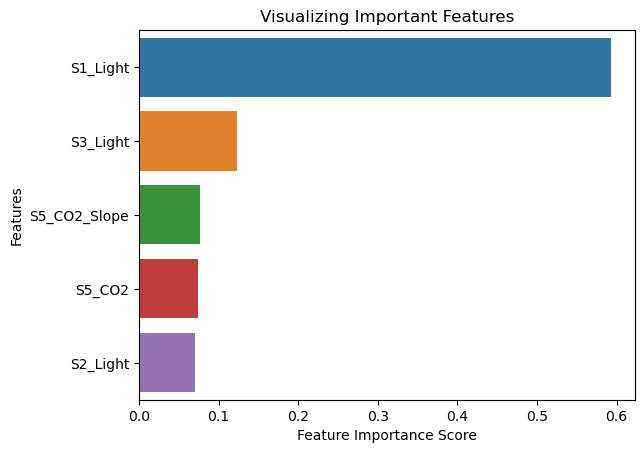

In [75]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

# Random Tree

In [61]:
# Random Tree
rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

In [62]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       0.98      0.96      0.97        67
           2       0.97      0.99      0.98       143
           3       0.99      0.98      0.98       124

    accuracy                           1.00      2026
   macro avg       0.99      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026



In [64]:
print(confusion_matrix(y_test,y_pred))

[[1692    0    0    0]
 [   0   64    3    0]
 [   0    1  141    1]
 [   2    0    1  121]]


# Finding the variable with more importance

In [65]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, rf_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:10]

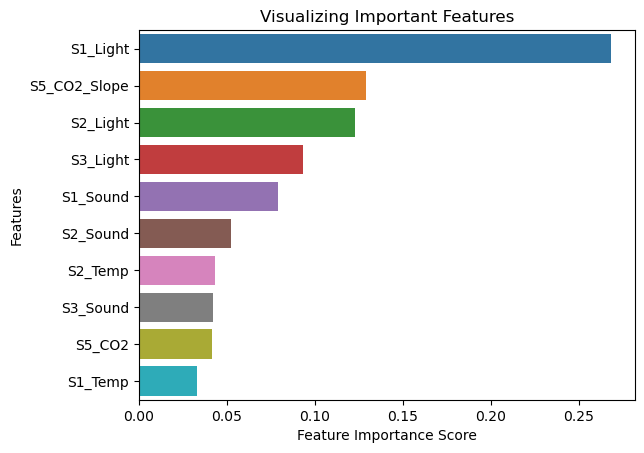

In [67]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

# AdaBoostClassifier

In [76]:
#AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [77]:
y_pred = ada_model.predict(X_test)

In [78]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1692
           1       1.00      0.90      0.94        67
           2       0.61      1.00      0.76       143
           3       0.01      0.01      0.01       124

    accuracy                           0.89      2026
   macro avg       0.65      0.71      0.67      2026
weighted avg       0.89      0.89      0.89      2026



# xg Boost

In [79]:
X_train.shape

(8103, 16)

In [80]:
#xg Boost model
xg_model = XGBClassifier(random_state=1)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [81]:
y_pred = xg_model.predict(X_test)

In [82]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred,average="macro")

0.9838526876873196

In [83]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       1.00      0.96      0.98        67
           2       0.97      0.99      0.98       143
           3       0.99      0.97      0.98       124

    accuracy                           1.00      2026
   macro avg       0.99      0.98      0.98      2026
weighted avg       1.00      1.00      1.00      2026



In [84]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, xg_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:10]

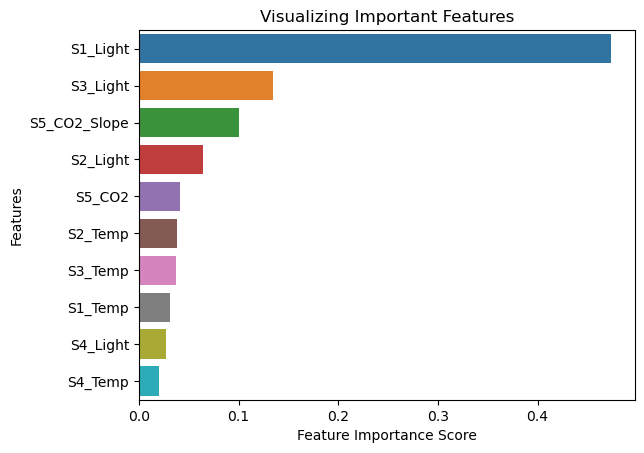

In [86]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

# With selected Feature

In [87]:
X = df[['S1_Light','S2_Light', 'S3_Light','S5_CO2_Slope']]

y = df['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [88]:
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       0.98      1.00      0.99        94
           2       0.97      0.97      0.97       147
           3       0.97      0.96      0.96       156

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



In [90]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       0.98      1.00      0.99        94
           2       0.97      0.97      0.97       147
           3       0.97      0.96      0.96       156

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026

[[1628    1    0    0]
 [   0   94    0    0]
 [   0    1  142    4]
 [   2    0    5  149]]


### Finding importance

In [91]:
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:]

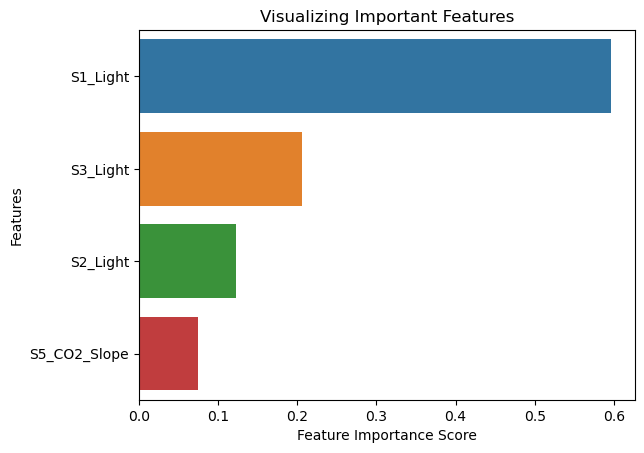

In [93]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

### save model

In [94]:
#save model
pickle.dump(dt_model, open("DesicionTree_model_reducedFeatures", 'wb'))

In [95]:
# load the model from disk
loaded_model3 = pickle.load(open("DesicionTree_model_reducedFeatures", 'rb'))
result = loaded_model3.score(X_test, y_test)
print(result)
y_pred = loaded_model3.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.993583415597236
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       0.98      1.00      0.99        94
           2       0.97      0.97      0.97       147
           3       0.97      0.96      0.96       156

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026

[[1628    1    0    0]
 [   0   94    0    0]
 [   0    1  142    4]
 [   2    0    5  149]]
